In [2]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution, maplotlib_plot_map as plot_map

In [12]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,19077,None,None,88615.998706
2020-06-13,19078,None,None,81887.949602
2020-06-14,19079,None,None,75691.932777
2020-06-15,19080,None,None,70029.247647
2020-06-16,19081,None,None,65073.033824
...,...,...,...,...
2020-12-17,19265,None,None,320060.720121
2020-12-18,19266,None,None,331118.290179
2020-12-19,19267,None,None,345699.826868


In [13]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/Downloads/zoe_uk_active_cases_2020-12-21_2020-12-21-17-33.pickle


In [14]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/Downloads/zoe_uk_active_cases_2020-12-20_2020-12-20-19-32.pickle


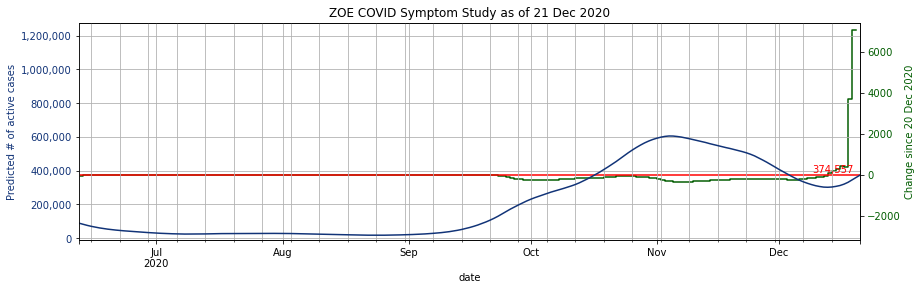

In [15]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

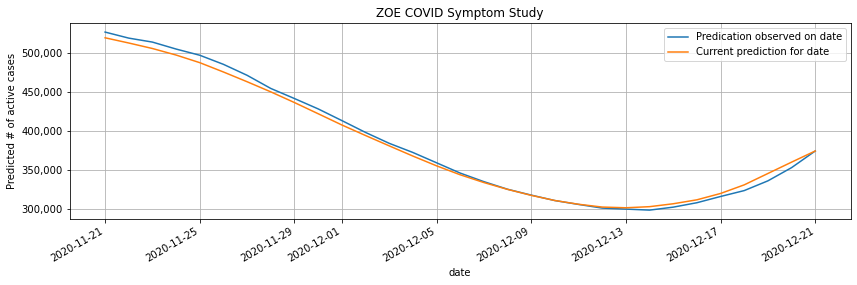

In [16]:
plot_study_evolution(curr_date, days=30)

In [17]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)
prevalence_map

,cartodb_id,the_geom,the_geom_webmercator,objectid,lad16cd,lad16nm,lad16nmw,bng_e,bng_n,long,...,discrete_percentage,discrete_cases_pm,discrete_cases_p100k,percentage_string,cases_pm_string,cases_p100k_string,cases_string,data_status,country,region
0,20333,0103000020E610000001000000C4010000AD9CD15F9CE2...,0103000020110F000001000000C401000034EC1A1775E3...,1,E06000001,Hartlepool,None,447157,531476,-1.27023,...,-1.0,-1,NaN,Not enough contributors,Not enough contributors,Not enough contributors,Not enough contributors,05:00:02 21-12-2020,England,North East
1,20334,0106000020E61000000200000001030000000100000013...,0106000020110F00000200000001030000000100000013...,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,...,0.1,1000,1000,1.1 %,11038,1104,1542,05:00:02 21-12-2020,England,North East
2,20335,0106000020E61000000200000001030000000100000006...,0106000020110F00000200000001030000000100000006...,3,E06000003,Redcar and Cleveland,None,464359,519597,-1.00611,...,0.1,500,500,0.4 %,3959,396,536,05:00:02 21-12-2020,England,North East
3,20336,0106000020E61000000200000001030000000100000025...,0106000020110F00000200000001030000000100000025...,4,E06000004,Stockton-on-Tees,None,444937,518183,-1.30669,...,0.1,500,500,0.3 %,3007,301,589,05:00:02 21-12-2020,England,North East
4,20337,0103000020E610000001000000B10200005CD5D7207503...,0103000020110F000001000000B10200005FAC44E29D8B...,5,E06000005,Darlington,None,428029,515649,-1.56835,...,0.1,1000,1000,0.6 %,6470,647,683,05:00:02 21-12-2020,England,North East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,20702,0106000020E610000002000000010300000001000000B0...,0106000020110F000002000000010300000001000000B0...,389,W06000022,Newport,Casnewydd,337897,187433,-2.89769,...,0.1,1000,1000,2.4 %,23520,2352,3578,05:00:02 21-12-2020,Wales,Wales
387,20703,0103000020E6100000010000006D1000003E242470162E...,0103000020110F0000010000006D10000075DF530DAA62...,390,W06000023,Powys,Powys,302328,273254,-3.43533,...,0.1,1000,1000,1.0 %,9520,952,1244,05:00:02 21-12-2020,Wales,Wales
388,20704,0103000020E61000000100000060010000CAAE459CF9AC...,0103000020110F000001000000600100003FE916C4D9A7...,391,W06000024,Merthyr Tydfil,Merthyr Tudful,305916,206424,-3.36425,...,-1.0,-1,NaN,Not enough contributors,Not enough contributors,Not enough contributors,Not enough contributors,05:00:02 21-12-2020,Wales,Wales
389,20705,0103000020E610000001000000C0000000CA21EFF2CDF8...,0103000020110F000001000000C0000000DEAADBECED86...,325,E09000032,Wandsworth,None,525152,174137,-0.20021,...,0.1,1000,1000,0.8 %,8310,831,2701,05:00:02 21-12-2020,England,London


In [18]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/Downloads/zoe_prevalence_map_2020-12-21_2020-12-21-17-33.pickle


In [19]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
341,Bridgend,W06000013,3.913891
381,Rhondda Cynon Taf,W06000016,3.176783
340,Neath Port Talbot,W06000012,3.041997
384,Torfaen,W06000020,2.706602
344,Cardiff,W06000015,2.641296
339,Swansea,W06000011,2.632371
386,Newport,W06000022,2.351955
382,Caerphilly,W06000018,2.271774
333,Flintshire,W06000005,1.926564
343,Vale of Glamorgan,W06000014,1.798240


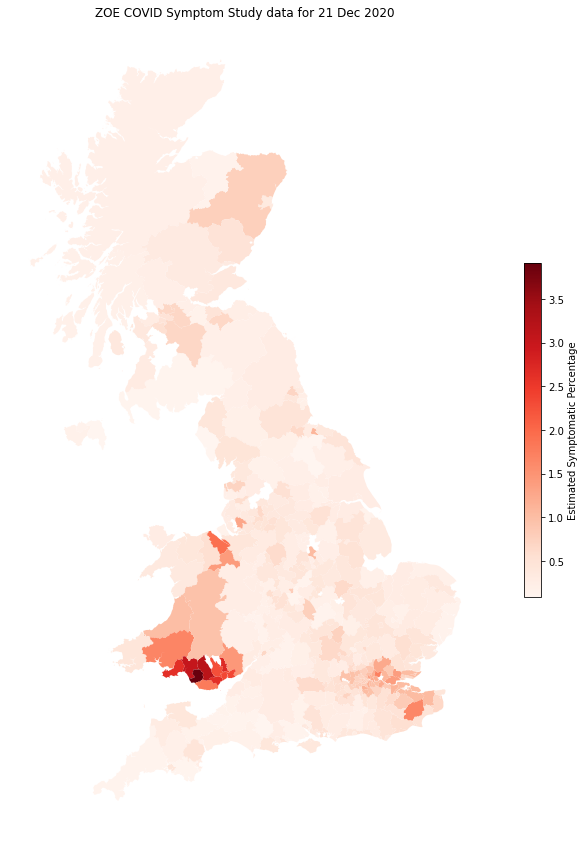

In [20]:
plot_map()